In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('bid_data.csv')


df_raw.drop(['Unnamed: 0','City','Project Type','Estimator','Project Name', 'Project Description'],axis = 1,inplace =True)
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Local        862 non-null    object
 1   Bid Type     862 non-null    object
 2   Design Type  862 non-null    object
 3   DEPT         862 non-null    object
 4   Bid Status   862 non-null    object
 5    Base Bid    862 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 40.5+ KB


In [3]:
df_raw["EST"] = df_raw.DEPT.map( lambda x: 1.0 if x==' Est. ' else 0.0 )
df_raw["PM"] = df_raw.DEPT.map( lambda x: 1.0 if x==' P.M. ' else 0.0 )
# df_raw["SP"] = df_raw.DEPT.map( lambda x: 1.0 if x==' S.P. ' else 0.0 )

df_raw.drop(['DEPT'], axis = 1, inplace = True)

In [4]:
# df_raw.Local.unique()

In [5]:
df_raw["OC"] = df_raw.Local.map( lambda x: 1.0 if x==' 441 OC ' else 0.0 )
# df_raw["LA"] = df_raw.Local.map( lambda x: 1.0 if x== ' 11 LA ' else 0.0 )
# df_raw["NonOC/LA"] = df_raw.Local.map( lambda x: 1.0 if ((x==' 440 RS ') or  (x==' 477 SB ') or (x==' 401 Reno '))  else 0.0 )

df_raw.drop(['Local'], axis = 1, inplace = True)

In [6]:
df_raw['Design Type'].unique()

array([' Engineered ', ' Design/Build ', ' Design/ Assist '], dtype=object)

In [7]:
# df_raw["Select"] = df_raw['Bid Type'].map( lambda x: 1.0 if x==' Select Bid List 'else 0.0 )
df_raw["Budget"] = df_raw['Bid Type'].map( lambda x: 1.0 if x==' Budget 'else 0.0 )
df_raw["Competitive"] = df_raw['Bid Type'].map( lambda x: 1.0 if x==' Competitive 'else 0.0 )
df_raw["Negotiated"] = df_raw['Bid Type'].map( lambda x: 1.0 if x==' Negotiated 'else 0.0 )
df_raw.drop(['Bid Type'], axis = 1, inplace = True)

In [8]:
df_raw["D/A"] = df_raw['Design Type'].map( lambda x: 1.0 if x==' Design/ Assist ' else 0.0 )
df_raw["D/B"] = df_raw['Design Type'].map( lambda x: 1.0 if x==' Design/Build ' else 0.0 )
# df_raw["Engine"] = df_raw['Design Type'].map( lambda x: 1.0 if x==' Engineered ' else 0.0 )
df_raw.drop(['Design Type'], axis = 1, inplace = True)

In [9]:
stats =df_raw[' Base Bid '].describe()
# df_raw["25% Bid"] = df_raw[' Base Bid '].map( lambda x: 1.0 if x<stats[4] else 0.0 )
df_raw["50% Bid"] = df_raw[' Base Bid '].map( lambda x: 1.0 if (x>=stats[4]) and (x<stats[5]) else 0.0 )
df_raw["75% Bid"] = df_raw[' Base Bid '].map( lambda x: 1.0 if (x>=stats[5]) and (x<stats[6]) else 0.0 )
df_raw["Big Bid"] = df_raw[' Base Bid '].map( lambda x: 1.0 if (x>=stats[6]) else 0.0 )
df_raw.drop([' Base Bid '], axis = 1, inplace = True)

In [10]:
df_raw["Bid Status"].unique()


array(['Lost', 'Awarded'], dtype=object)

In [11]:
df_raw["Bid Status"] = df_raw['Bid Status'].map( lambda x: 1.0 if x=='Awarded' else 0.0 )
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bid Status   862 non-null    float64
 1   EST          862 non-null    float64
 2   PM           862 non-null    float64
 3   OC           862 non-null    float64
 4   Budget       862 non-null    float64
 5   Competitive  862 non-null    float64
 6   Negotiated   862 non-null    float64
 7   D/A          862 non-null    float64
 8   D/B          862 non-null    float64
 9   50% Bid      862 non-null    float64
 10  75% Bid      862 non-null    float64
 11  Big Bid      862 non-null    float64
dtypes: float64(12)
memory usage: 80.9 KB


In [17]:
pro = ProfileReport(df_raw, title='featurized ', html={'style':{'full_width':True}})
pro.to_file('bid_profile.html')

In [13]:
df_raw.groupby(['D/B','Big Bid','Bid Status']).count()

EST   PM   OC  Budget  Competitive  Negotiated  D/A  \
D/B Big Bid Bid Status                                                        
0.0 0.0     0.0          49   49   49      49           49          49   49   
            1.0          98   98   98      98           98          98   98   
    1.0     0.0         109  109  109     109          109         109  109   
            1.0          72   72   72      72           72          72   72   
1.0 0.0     0.0          47   47   47      47           47          47   47   
            1.0         452  452  452     452          452         452  452   
    1.0     0.0          15   15   15      15           15          15   15   
            1.0          20   20   20      20           20          20   20   

                        50% Bid  75% Bid  
D/B Big Bid Bid Status                    
0.0 0.0     0.0              49       49  
            1.0              98       98  
    1.0     0.0             109      109  
            1.0              72       72  
1.0 0.0     0.0              47       47  
            1.0             452      452  
    1.0     0.0              15       15  
            1.0              20       20

In [14]:
df_raw.groupby(['50% Bid','Bid Status']).count()

EST   PM   OC  Budget  Competitive  Negotiated  D/A  D/B  \
50% Bid Bid Status                                                             
0.0     0.0         195  195  195     195          195         195  195  195   
        1.0         452  452  452     452          452         452  452  452   
1.0     0.0          25   25   25      25           25          25   25   25   
        1.0         190  190  190     190          190         190  190  190   

                    75% Bid  Big Bid  
50% Bid Bid Status                    
0.0     0.0             195      195  
        1.0             452      452  
1.0     0.0              25       25  
        1.0             190      190

In [15]:
df_raw.groupby(['75% Bid','Bid Status']).count()

EST   PM   OC  Budget  Competitive  Negotiated  D/A  D/B  \
75% Bid Bid Status                                                             
0.0     0.0         165  165  165     165          165         165  165  165   
        1.0         482  482  482     482          482         482  482  482   
1.0     0.0          55   55   55      55           55          55   55   55   
        1.0         160  160  160     160          160         160  160  160   

                    50% Bid  Big Bid  
75% Bid Bid Status                    
0.0     0.0             165      165  
        1.0             482      482  
1.0     0.0              55       55  
        1.0             160      160

In [16]:
df_raw.groupby(['Bid Status','Big Bid','EST']).count()

PM   OC  Budget  Competitive  Negotiated  D/A  D/B  \
Bid Status Big Bid EST                                                        
0.0        0.0     0.0   57   57      57           57          57   57   57   
                   1.0   39   39      39           39          39   39   39   
           1.0     0.0   19   19      19           19          19   19   19   
                   1.0  105  105     105          105         105  105  105   
1.0        0.0     0.0  503  503     503          503         503  503  503   
                   1.0   47   47      47           47          47   47   47   
           1.0     0.0   20   20      20           20          20   20   20   
                   1.0   72   72      72           72          72   72   72   

                        50% Bid  75% Bid  
Bid Status Big Bid EST                    
0.0        0.0     0.0       57       57  
                   1.0       39       39  
           1.0     0.0       19       19  
                   1.0      105      105  
1.0        0.0     0.0      503      503  
                   1.0       47       47  
           1.0     0.0       20       20  
                   1.0       72       72

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import balanced_accuracy_score, accuracy_score,accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import statsmodels.api as sm


from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
y = df_raw['Bid Status']
X = df_raw.drop(['Bid Status'],axis = 1)
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [4]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif["features"] = X.columns
vif

NameError: name 'X' is not defined

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled)

NameError: name 'train_test_split' is not defined

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)


NameError: name 'LogisticRegression' is not defined

In [7]:
yhat = model.predict(X_test)


NameError: name 'model' is not defined

In [8]:

mse = mean_squared_error(y_test, yhat)
print(mse)
rmse = np.sqrt(mse)
print(rmse)


NameError: name 'mean_squared_error' is not defined

In [1042]:
print(balanced_accuracy_score(y_test, yhat))


0.7681291292479329


In [1043]:
accuracy_score(y_test, yhat)

0.7672955974842768

In [1044]:
print(f1_score(y_test, yhat))
print(precision_score(y_test, yhat))
print(recall_score(y_test, yhat)) 

0.7797619047619049
0.7318435754189944
0.8343949044585988


In [1045]:
probs = model.predict_proba(X_test)[:,1]

#adjust threshold?

In [1046]:
confusion_matrix(y_test, yhat)


array([[113,  48],
       [ 26, 131]])

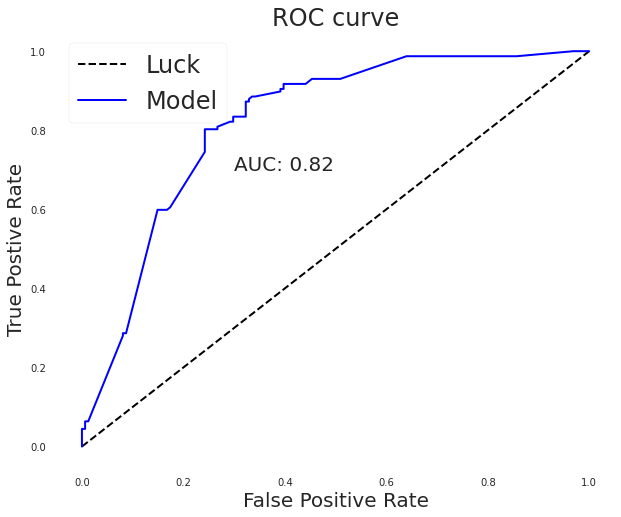

In [1047]:
# COST BENEFIT?
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
auc = metrics.roc_auc_score(y_test, probs)

# Plot the ROC
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck')
ax.plot(fpr, tpr, color='b', lw=2, label='Model')
ax.set_xlabel("False Positive Rate", fontsize=20)
ax.set_ylabel("True Postive Rate", fontsize=20)
ax.set_title("ROC curve", fontsize=24)
ax.text(0.3, 0.7, " ".join(["AUC:",str(auc.round(3))]), fontsize=20)
ax.legend(fontsize=24);

In [1048]:
thresh = .40

y_hat = (probs >= thresh).astype(int)
print(f1_score(y_test, y_hat))
print(precision_score(y_test, y_hat))
print(recall_score(y_test, y_hat)) 
accuracy_score(y_test, y_hat)


0.7942857142857144
0.7202072538860104
0.8853503184713376


0.7735849056603774

In [1049]:
confusion_matrix(y_test, y_hat)


array([[107,  54],
       [ 18, 139]])

In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
est = SGDClassifier(max_iter =5000)
est.fit(X_train,y_train)
y_hat= est.predict(X_test)


y_hat


NameError: name 'SGDClassifier' is not defined

In [1051]:


print("LogisticRegression Coefficents: {}".format(model.coef_))
print("SGD Coefficents: {}".format(est.coef_))
X.columns

LogisticRegression Coefficents: [[-0.66951312  0.5336755   1.25566586  0.28957058 -0.66262425  1.88613845
   0.49113241  0.70920576  0.16524449 -0.23110369 -1.16114312]]
SGD Coefficents: [[-0.92324776  0.56486501  1.32422805 -0.36909812 -1.04031067  2.53880797
   0.8098344   1.19960016  0.61581536 -0.38789007 -1.44682996]]


Index(['EST', 'PM', 'OC', 'Budget', 'Competitive', 'Negotiated', 'D/A', 'D/B',
       '50% Bid', '75% Bid', 'Big Bid'],
      dtype='object')

In [1052]:

print(f1_score(y_test, y_hat))
print(precision_score(y_test, y_hat))
print(recall_score(y_test, y_hat)) 
print(accuracy_score(y_test, y_hat))
confusion_matrix(y_test, y_hat)

0.7953890489913545
0.7263157894736842
0.8789808917197452
0.7767295597484277


array([[109,  52],
       [ 19, 138]])

In [1053]:
from sklearn.model_selection import GridSearchCV

In [1054]:
lin_reg_grid = {'C':[1,10,100,1000], 
                'solver' : ['newton-cg', 'liblinear', 'sag','saga'],
                'max_iter' : [2,5,10,100,500,1000]
                
               }
scoring = {'Accuracy': 'accuracy', 'F1': 'f1', 'Precision' :'precision', 'Recall':'recall'}

In [1055]:
lin_reg_gridsearch = GridSearchCV(LogisticRegression(), lin_reg_grid, n_jobs = -1,scoring = 'accuracy')

In [1056]:
lin_reg_gridsearch.fit(X_train, y_train)
param = lin_reg_gridsearch.best_params_

/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iter

/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which me

/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached w

/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


In [1057]:
print("Best parameters set found on development set:")
print()
print(lin_reg_gridsearch.best_params_)
print()
print("Grid scores on development set:")
print()
means = lin_reg_gridsearch.cv_results_['mean_test_score']
stds = lin_reg_gridsearch.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, lin_reg_gridsearch.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()


Best parameters set found on development set:

{'C': 10, 'max_iter': 2, 'solver': 'newton-cg'}

Grid scores on development set:

0.773 (+/-0.074) for {'C': 1, 'max_iter': 2, 'solver': 'newton-cg'}
0.775 (+/-0.070) for {'C': 1, 'max_iter': 2, 'solver': 'liblinear'}
0.761 (+/-0.079) for {'C': 1, 'max_iter': 2, 'solver': 'sag'}
0.774 (+/-0.065) for {'C': 1, 'max_iter': 2, 'solver': 'saga'}
0.775 (+/-0.064) for {'C': 1, 'max_iter': 5, 'solver': 'newton-cg'}
0.774 (+/-0.066) for {'C': 1, 'max_iter': 5, 'solver': 'liblinear'}
0.775 (+/-0.063) for {'C': 1, 'max_iter': 5, 'solver': 'sag'}
0.770 (+/-0.067) for {'C': 1, 'max_iter': 5, 'solver': 'saga'}
0.774 (+/-0.060) for {'C': 1, 'max_iter': 10, 'solver': 'newton-cg'}
0.774 (+/-0.066) for {'C': 1, 'max_iter': 10, 'solver': 'liblinear'}
0.773 (+/-0.063) for {'C': 1, 'max_iter': 10, 'solver': 'sag'}
0.775 (+/-0.064) for {'C': 1, 'max_iter': 10, 'solver': 'saga'}
0.774 (+/-0.060) for {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}
0.774 (+/-0.06

In [1099]:
probs = lin_reg_gridsearch.predict_proba(X_test)[:,1]
thresh = .6
y_hat = (probs >= thresh).astype(int)
print(f1_score(y_test, y_hat))
print(precision_score(y_test, y_hat))
print(recall_score(y_test, y_hat)) 
print(accuracy_score(y_test, y_hat))
confusion_matrix(y_test, y_hat)

0.7753846153846153
0.75
0.802547770700637
0.7704402515723271


array([[119,  42],
       [ 31, 126]])

In [1059]:


print("LogisticRegression Coefficents: {}".format(lin_reg_gridsearch.best_estimator_.coef_))


LogisticRegression Coefficents: [[-0.71518436  0.27857717  1.09502603  0.13663806 -0.81988585  1.44164956
   0.39737564  0.44545845  0.26579821 -0.34512926 -1.17466948]]


In [1060]:
len(lin_reg_gridsearch.best_estimator_.coef_[0])

11

In [1061]:
len(X.columns)

11

In [1062]:
dict(zip(X.columns,lin_reg_gridsearch.best_estimator_.coef_[0]))

{'EST': -0.7151843616957279,
 'PM': 0.27857716940762156,
 'OC': 1.0950260340062825,
 'Budget': 0.13663806241228962,
 'Competitive': -0.819885845380375,
 'Negotiated': 1.4416495588917886,
 'D/A': 0.397375636023085,
 'D/B': 0.44545845347735785,
 '50% Bid': 0.26579820556337597,
 '75% Bid': -0.34512926090631335,
 'Big Bid': -1.1746694849649595}